# EuroSAT Classification — Train classifier

This notebook fine-tunes a **ResNet-50** model (or trains a SimpleCNN baseline) on the EuroSAT dataset.

It follows the experimental setup described in:

'*EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification*' by Helber et al., 
IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 2019.

### 1. Setup environment and imports

In [1]:
import sys, os
if not hasattr(sys, "frozen"):
    os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

import torch
from torchvision import models
import torch.nn as nn

# Add project root to path
sys.path.append(os.path.abspath("..")) 
from src.training.train import train_model
from src.training.evaluate import evaluate_model, plot_confusion_matrix

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"🚀 Using device: {device}")

🚀 Using device: cpu


- Configuration

In [2]:
model_name = "resnet50"   # Options: "simplecnn", "resnet18", "resnet50"
data_dir = "../data/raw"  
checkpoint_dir = "../experiments/checkpoints"
epochs = 100
early_stopping = 10
batch_size = 256
lr = 1e-4

checkpoint_path = os.path.join(checkpoint_dir, f"{model_name}_adv.pth")


### 2. Train baseline SimpleCNN / ResNet18 / ResNet50 model

In [3]:
print(f"\n🛰️ Training {model_name.upper()} on EuroSAT dataset...")

model, classes = train_model(
    data_dir=data_dir,
    batch_size=batch_size,
    epochs=epochs,
    lr=lr,
    model_name=model_name,
    output_dir=checkpoint_dir,
    early_stopping_patience=early_stopping,
)

print(f"\n✅ Training completed. Number of classes: {len(classes)}")
print(f"Model checkpoint saved to: {checkpoint_path}")


🛰️ Training RESNET50 on EuroSAT dataset...
🔧 Using device: cpu

📘 Epoch 1/100


KeyboardInterrupt: 

### 3. Evaluate final metrics on Test Dataset


📊 Evaluating model on test set...
🔧 Using device: cpu

🧪 Evaluating model on test set...



🎯 Test Accuracy: 99.71%
Test Loss: 0.0124

Classification metrics per category:

              precision    recall  f1-score   support

  AnnualCrop     0.9977    0.9908    0.9942       436
      Forest     0.9957    1.0000    0.9979       465
 Residential     0.9978    1.0000    0.9989       456
       River     0.9973    0.9973    0.9973       368

    accuracy                         0.9971      1725
   macro avg     0.9971    0.9970    0.9971      1725
weighted avg     0.9971    0.9971    0.9971      1725



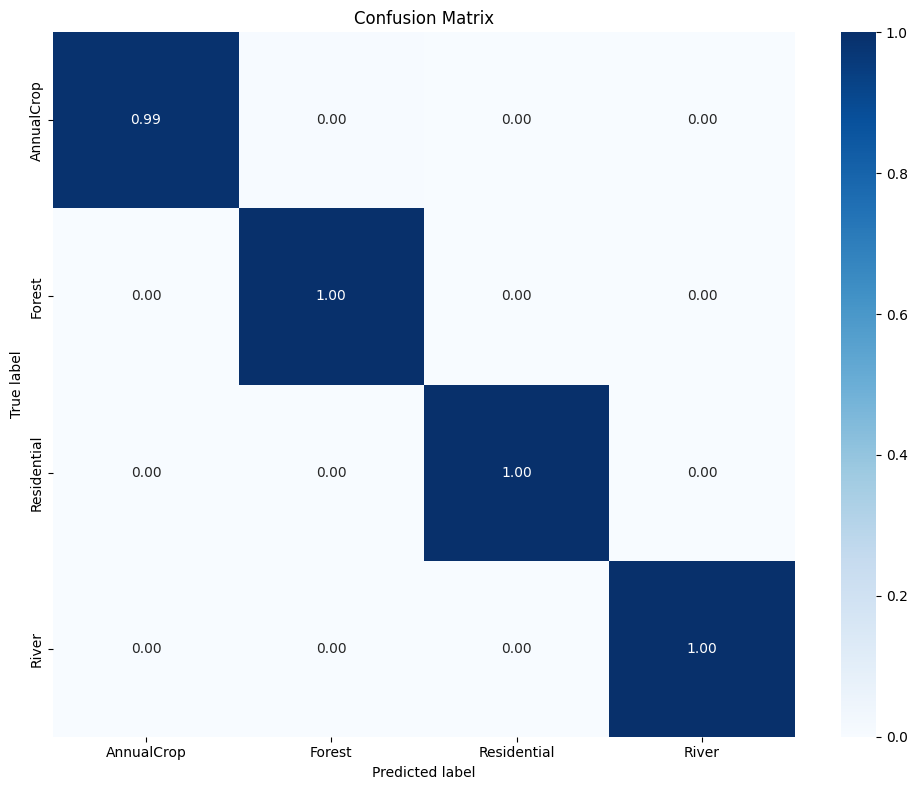

In [3]:
print("\n📊 Evaluating model on test set...")

metrics = evaluate_model(
    model_path=checkpoint_path,
    data_dir=data_dir,
    batch_size=batch_size,
    model_name=model_name,
    device=device
)

- Metrics

In [4]:
print("\n📈 Test Set Performance:")
print(f"Accuracy:  {metrics['accuracy']*100:.2f}%")
print(f"Loss:      {metrics['loss']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall:    {metrics['recall']:.4f}")
print(f"F1-score:  {metrics['f1']:.4f}")

print("\n🔍 Classification metrics per class:\n")
print(metrics["classification_report"])



📈 Test Set Performance:
Accuracy:  99.71%
Loss:      0.0124
Precision: 0.9971
Recall:    0.9970
F1-score:  0.9971

🔍 Classification metrics per class:

              precision    recall  f1-score   support

  AnnualCrop     0.9977    0.9908    0.9942       436
      Forest     0.9957    1.0000    0.9979       465
 Residential     0.9978    1.0000    0.9989       456
       River     0.9973    0.9973    0.9973       368

    accuracy                         0.9971      1725
   macro avg     0.9971    0.9970    0.9971      1725
weighted avg     0.9971    0.9971    0.9971      1725



- Confusion Matrix


🧭 Confusion Matrix:


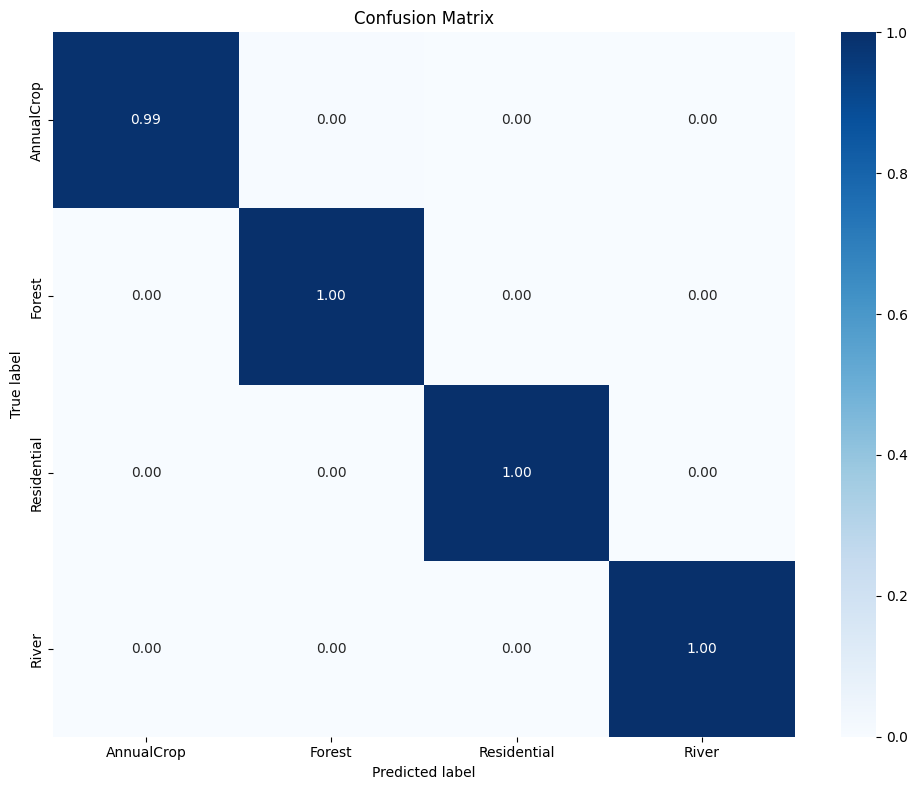

In [5]:
print("\n🧭 Confusion Matrix:")
plot_confusion_matrix(metrics["confusion_matrix"], metrics["class_names"])